# Comparando desempenho de RNN e CNN em dados de imagens de cães e gatos.

### Kezia e Renan

## Introdução
As redes neurais estão transformando o modo como pessoas e empresas interagem com os
sistemas, resolvem problemas, tomam decisões e fazem melhores previsões. Existem
diferentes tipos de redes neurais, como por exemplo: Redes neurais tradicionais, que são
aquelas mais básicas, onde a informação de entrada flui em sequência linear até a saída. Ou
seja, em cada neurônio ocorre uma operação matemática linear. Outro exemplo seria as redes
neurais convolucionais (RNCs)  as quais contêm cinco tipos de camadas: de entradas, de
convolução, de agrupamento, as completamente conectadas e as de saída. Cada camada tem
um propósito específico, como de resumo, conexão ou ativação. As redes neurais
convolucionais popularizaram a classificação de imagens e a detecção de objetos. Entretanto,
RNCs também foram aplicadas em outras áreas como previsão e processamento de linguagem
natural. E como possuem camadas escondidas entre as camadas de entrada e saídas podem
ser consideradas redes mais complexas.

A classificação de imagens tem se tornado um processo cada vez mais útil para o mundo em
que vivemos. Esse processo se dá pela extração de informações em imagens para reconhecer
padrões e objetos homogêneos. O objetivo do trabalho em questão é a classificação de
cachorros e gatos através de imagens. Para isto, a metodologia abordada será redes neurais. O
método de rede neural tradicional será comparado ao método de rede neural convolucional
com o objetivo de verificar qual método é o mais eficaz ao classificar os animais. Utilizando
como métricas de comparação a acurácia e a função perda encontrada para ambos os
métodos. Enquanto se busca redução da taxa de perda espera se o aumento da acurácia do
modelo.
O conjunto de dados de treino contém 25000 imagens de cachorros e gatos. Primeiramente foi
realizado o pré processamento dos dados, onde a variável resposta assume valor 1 se o animal
classificado for cachorro e 0 se for gato. Para o banco de dados em questão tem se o mesmo
número de cães e gatos, correspondente a 12.000 animais para cada classe.

In [194]:
# Importando bibliotecas

import numpy as np # Manipulação matricial
import pandas as pd # Manipulação de bases de dados
from keras.preprocessing.image import ImageDataGenerator, load_img # Leitor e gerador de pseudo imagens
from keras.utils import to_categorical # Utilitario para categorizar
from sklearn.model_selection import train_test_split # Divisor de bases em amostra de teste treinamento
import matplotlib.pyplot as plt # Manipulador de imagens
import random # Extrator de amostra aleatória
import os # Importador de função de iterção com o sistema operacional
from keras.models import Sequential # Arquitetador de modelos de Redes Neurais
from keras.layers import Conv2D, MaxPooling2D, Dropout, \
    Flatten, Dense, Activation, BatchNormalization # Funçõs uteis para construção de CNN

from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Funções para otimização de treinamentos

## Construindo o modelo
Para a construção do modelo é necessário a realização de alguns passos. Primeiro a construção
da primeira camada de entrada que representa os dados de entrada da imagem. Ela irá
remodelar a imagem em uma matriz com dimensão única. A segunda camada é responsável
por extrair os recursos da imagem. A terceira camada reduz o volume espacial da imagem de
entrada após o processo de convolução. A quarta camada, basicamente conecta a rede de uma
camada a outra. Por fim, a camada de saída, que por sua vez, é a camada de valores previstos.

Parada antecipada
A fim de evitar o sobreajuste, foi realizada uma parada do aprendizado após 10 épocas , além
disso, a função perda não decresce mais.

Redução da taxa de aprendizagem
A taxa de aprendizagem será reduzida toda vez que a precisão não aumentar em 2 etapas .

Preparando os dados
O classificador de imagens utilizado considera categorias e não números. Diante disso será
necessário a transformação converter a categoria da coluna em string. Portanto
converteremos 1 para cachorros e 0 para gatos .
Após a realização da conversão foram consideradas para os dados de treino 20000 imagens
sendo 10000 imagens referentes a cachorros e 10000 imagens referentes a gatos. E para os
dados de validação do modelo 2500 imagens para cada uma das duas classes de animais.

Previsão
Para a classificação por cada categoria a previsão virá com a probabilidade de cada categoria.
Agora será necessário voltar a considerar as classes como números. Ou seja, retornaremos a
codificação de 1 como cachorro e 0 para gato.
Conclusão

Pode se observar através dos resultados obtidos que o modelo obteve uma boa eficácia na
classificação dos animais, porém a maioria das imagens foi classificada como cachorros. Ou
seja, o modelo erra mais ao classificar os gatos.

In [195]:
path = "dogs-vs-cats/train/" # Diretório raiz para os dados

In [196]:
# Listando todos os arquivos que pertecem ao conjunto de dados, bem como extração 
# de amostra balanceada de cães e gatos

filenames = os.listdir(path)
categories1 = []
categories2 = []
f1 = []
f2 = []
for filename in filenames:
    fil = random.sample(filenames, 1)[0]
    category = fil.split('.')[0]
    if category == 'dog':
      if(len(f1) == 2000):
        pass
      else:
        f1.append(fil)
        categories1.append(1)
    else:
      if(len(f2)== 2000):
        pass
      else:
        f2.append(fil)
        categories2.append(0)

In [197]:
# Construção de data frame com o nome das imagens que serão utilizadas, 
# assim como a contrução de uma variável resposta binária com 1 para cães e 
# 0 para gatos

f = f1.copy()
[f.append(x) for x in f2]
category = categories1.copy()
[category.append(x) for x in categories2]
df = pd.DataFrame({
    'filename': f,
    'category': category
})

df

,filename,category
0,dog.10167.jpg,1
1,dog.10922.jpg,1
2,dog.3981.jpg,1
3,dog.543.jpg,1
4,dog.4080.jpg,1
...,...,...
3995,cat.4121.jpg,0
3996,cat.8628.jpg,0
3997,cat.10840.jpg,0
3998,cat.10003.jpg,0


Aqui algumas inagems de dados que existem nas nossas bases

/home/encrypted/rsilva/.virtualenvs/oms/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


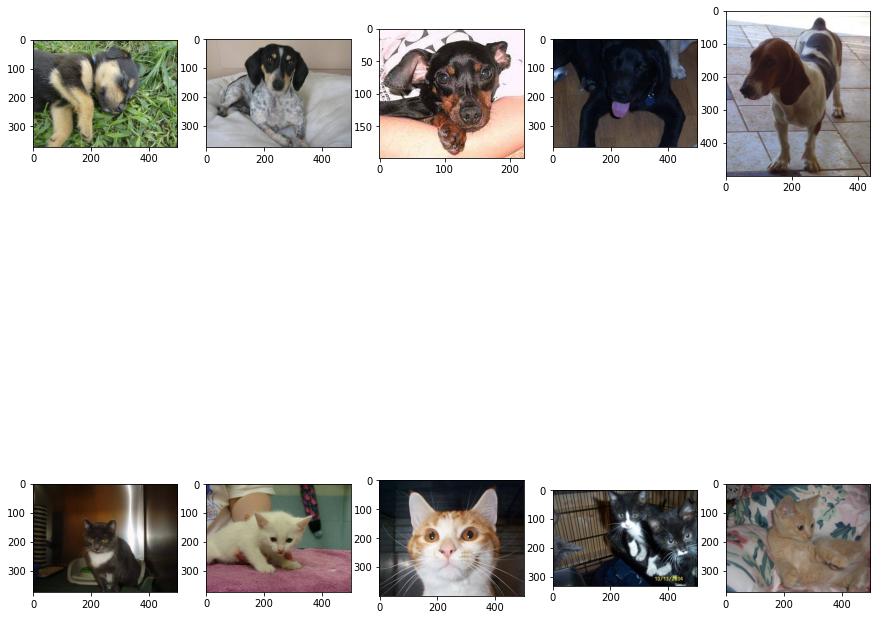

In [198]:
# Amostra de exemplo de imagens de cães e gatos da amostra extraida

sample = random.sample(f1, 5)
sample2 = random.sample(f2, 5)
[sample.append(x) for x in sample2]
image = [load_img(path+x) for x in sample]
fig, ax = plt.subplots(2, 5, figsize = (15,15))
[ax[0,id].imshow(x) for id, x in enumerate(image[:5])]
[ax[1,id].imshow(x) for id, x in enumerate(image[5:])]
fig.show()


## Construindo o modelo
Para a construção do modelo é necessário a realização de alguns passos. Primeiro a construção
da primeira camada de entrada que representa os dados de entrada da imagem. Ela irá
remodelar a imagem em uma matriz com dimensão única. A segunda camada é responsável
por extrair os recursos da imagem. A terceira camada reduz o volume espacial da imagem de
entrada após o processo de convolução. A quarta camada, basicamente conecta a rede de uma
camada a outra. Por fim, a camada de saída, que por sua vez, é a camada de valores previstos.

Após alguns teste de desempenho utilizando as alteração de imagens para erriquecimento, percebeu-se que utilizar toda a base de dados com a arquiterua proposta levava cerca de 5h para treinamento. Foi conseguindo um acurácia de 92%, contudo o tempo de treinamento era iviável para realizar testes mais profundos na arquitetura da rede. Desta forma seguimos a análise com um amostra balanceada de tanho 4 mil.

In [199]:
FAST_RUN = False # Parâmetro conveniente que define apenas se utilizaremos um treinamento rápido (poucas época)
IMAGE_WIDTH=128 # Tamanho de largura padrão usado para as imagens
IMAGE_HEIGHT=128 # Tamanho de altura padrão usado para as imagens
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT) # Construção das dimensões
IMAGE_CHANNELS=3 # Canais utilizados (RGB)

In [200]:
# Arquitetando rede CNN

model = Sequential() # Iniciando modelo

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH,
    IMAGE_HEIGHT, IMAGE_CHANNELS))) # Camada de convolução com 32 saida e que aplica filtros de 3x3
model.add(BatchNormalization()) # Nomalização da saida anterior 
model.add(MaxPooling2D(pool_size=(2, 2))) # Redução das informações das imagens
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu')) # Camada de convolução com 64 saida e que aplica filtros de 3x3
model.add(BatchNormalization()) # Nomalização da saida anterior 
model.add(MaxPooling2D(pool_size=(2, 2))) # Redução das informações das imagens
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu')) # Camada de convolução com 128 saida e que aplica filtros de 3x3
model.add(BatchNormalization()) # Nomalização da saida anterior 
model.add(MaxPooling2D(pool_size=(2, 2))) # Redução das informações das imagens
model.add(Dropout(0.25))

model.add(Flatten()) # Etápa que reduz a inforção vinda da camada anterior em um vetor de informações
model.add(Dense(512, activation='relu')) # Neuronios com função de ativação Relu
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # Função de ativação softmax por se tratar de uma boa função de ativação para problemas de classificação. Por isso também a saida com apenas 2 neurônios

model.compile(loss='categorical_crossentropy',
    optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 64)        0         
__________

## Parada antecipada
A fim de evitar o sobreajuste, foi realizada uma parada do aprendizado após 10 épocas , além
disso, a função perda não decresce mais.

## Redução da taxa de aprendizagem
A taxa de aprendizagem será reduzida toda vez que a precisão não aumentar em 2 etapas .

In [201]:
earlystop = EarlyStopping(patience=10) # Facilitador de parada ajustado para avaliar pouco aprendizado em até 10 passos, caso ocorra, o treinamento para

# Função para redução do eta casos se perceba a proximidade do pondo de mínimo
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction] # Retornos exibidos na tela

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42) # Separando em teste e treinamento
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

train_df['category'].value_counts(normalize = True)

cat    0.506875
dog    0.493125
Name: category, dtype: float64

In [202]:
validate_df

,filename,category
0,dog.6406.jpg,dog
1,cat.5379.jpg,cat
2,dog.10992.jpg,dog
3,cat.971.jpg,cat
4,cat.3004.jpg,cat
...,...,...
795,dog.3398.jpg,dog
796,dog.9077.jpg,dog
797,cat.2055.jpg,cat
798,dog.3789.jpg,dog


In [247]:
# Definindo base de treino com aplicação de alterações sintéticas, para enrique-
# cimento da base

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

train_datagen = ImageDataGenerator(
    rotation_range=15, # Adciona rotações de 15 graus as imagens originais
    rescale=1./255, # Padronizando escala
    shear_range=0.1, # Alcance de cortes
    zoom_range=0.2, # Alterações de zoom
    horizontal_flip=True, # Espelhamento das imagens
    width_shift_range=0.1, # Alteração de largura
    height_shift_range=0.1 # Alteração de altura
)
print(total_train, total_validate)

3200 800


In [248]:
# Gerando base de treino

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3200 validated image filenames belonging to 2 classes.


In [249]:
# Gerando base de validação

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 800 validated image filenames belonging to 2 classes.


In [206]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)


Found 1 validated image filenames belonging to 1 classes.


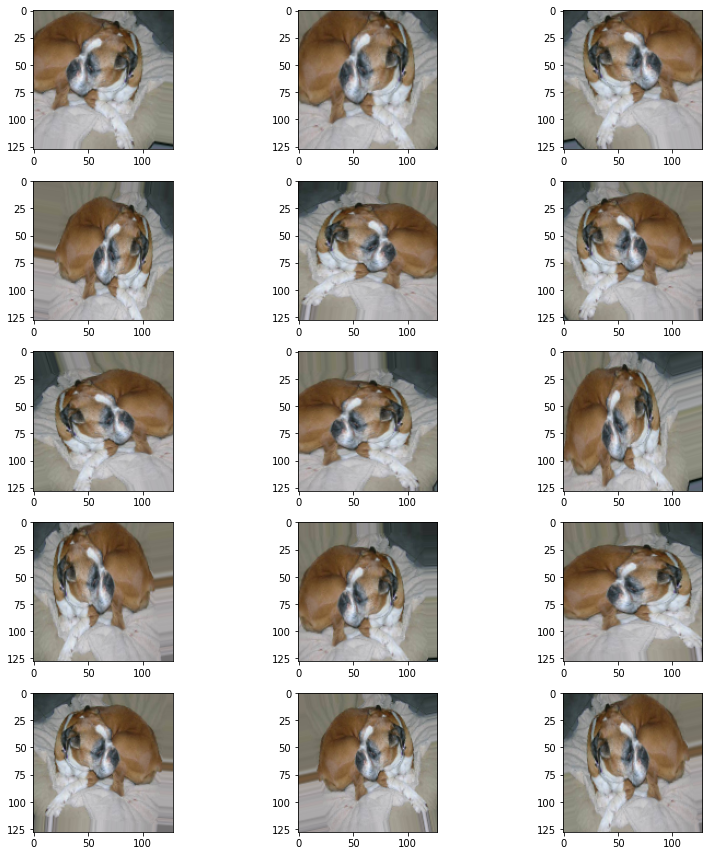

In [207]:
# Exibindo imagens com erriqecimento de imagens com alterações sintéticas
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [208]:
# Treinado o modelo de CNN

history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
213/213 [==============================] - 74s 349ms/step - loss: 1.1522 - acc: 0.5790 - val_loss: 0.9418 - val_acc: 0.5509
Epoch 2/50
213/213 [==============================] - 51s 240ms/step - loss: 0.7914 - acc: 0.6069 - val_loss: 0.6961 - val_acc: 0.6369
Epoch 3/50
213/213 [==============================] - 51s 240ms/step - loss: 0.6935 - acc: 0.6275 - val_loss: 0.6435 - val_acc: 0.6471
Epoch 4/50
213/213 [==============================] - 53s 247ms/step - loss: 0.6439 - acc: 0.6473 - val_loss: 0.6349 - val_acc: 0.6904
Epoch 5/50
213/213 [==============================] - 52s 245ms/step - loss: 0.6008 - acc: 0.6936 - val_loss: 0.6000 - val_acc: 0.7032
Epoch 6/50
213/213 [==============================] - 52s 245ms/step - loss: 0.5872 - acc: 0.6973 - val_loss: 0.5522 - val_acc: 0.7299
Epoch 7/50
213/213 [==============================] - 52s 245ms/step - loss: 0.5708 - acc: 0.7149 - val_loss: 0.6455 - val_acc: 0.6930
Epoch 8/50
213/213 [==============================] - 5

In [210]:
# Salvando o modelo

pd.to_pickle(model, 'modelo.pickle')

In [413]:
# Testando o modelo em amostra de 500 imagens da base

test_filenames = os.listdir(path)
test_df = pd.DataFrame({
    'filename': test_filenames
}).sample(500)
nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    path, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

test_df['resp'] = test_df['filename'].apply(lambda x: x[:3])
test_df['resp_n'] = test_df['resp'].apply(lambda x: 1 if x == 'dog' else 0)

test_df

Found 500 validated image filenames.


,filename,resp,resp_n
24553,cat.11262.jpg,cat,0
22599,dog.9045.jpg,dog,1
12931,cat.10310.jpg,cat,0
23280,dog.11933.jpg,dog,1
17940,cat.10300.jpg,cat,0
...,...,...,...
20761,dog.6500.jpg,dog,1
12938,dog.5503.jpg,dog,1
3279,dog.446.jpg,dog,1
8468,dog.3809.jpg,dog,1


## Previsão
Para a classificação por cada categoria a previsão virá com a probabilidade de cada categoria.
Agora será necessário voltar a considerar as classes como números. Ou seja, retornaremos a
codificação de 1 como cachorro e 0 para gato.

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [420]:
# Matriz de confusão

mat_conf = pd.crosstab(np.argmax(predict, axis=-1), test_df['resp_n'])
mat_conf/mat_conf.sum().sum()

resp_n,0,1
row_0,,
0,0.434,0.090
1,0.080,0.396


## Comparando com RNN

Primeiramente utilizando os mutiplos canais de uma imagens, treinamos um modelo com camadas profundas e com imagens de entradas de imagens enriquecidas. Essa opção foi utilizada para fazer com que as duas técnicas se beneficiasse do aumento de informação. Contudo as redes RNN chegaram a um nível máximo de 52.2% de acurácia. Para tentar incluir mais camadas profundas sem aumentar muito o tempo de treinamento, foi utilizadas imagens transformadas em preto e branco,  reduzindo a dimensão das entradas, mas mesmo assim não houve uma melhora significante no modelo, até mesmo foi piorada a acurácia.

In [396]:
# Utilizando opencv para fazer trasformações para uso em RNN

import cv2
img_trains = [cv2.imread(path+x) for x  in train_df['filename']] # Lendo imagens
img_trains = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in img_trains]  # Convertendo para preto e branco
img_trains = [cv2.resize(x, (128, 128)) for x in img_trains] # Fixando dimensão das imagens
X_treino = np.array(img_trains).reshape((-1, 128*128)) # Fazendo imagens irem para a primeira dimensão 

In [381]:
def conv(x):
  if x == 'dog':
    return 1
  else:
    return 0

y_treino = train_df['category'].map(conv)

y_treino

0       0
1       1
2       0
3       1
4       1
       ..
3195    1
3196    1
3197    1
3198    0
3199    0
Name: category, Length: 3200, dtype: int64

In [397]:
print(y_treino.shape, X_treino.shape)

(3200,) (3200, 16384)


In [398]:
# ARQUITETURA DA REDE
ann = Sequential([
  Dense(32, activation='relu', input_shape=(128*128,)),
  Dense(64, activation='relu'),
  Dense(128, activation='relu'),
  Dense(512, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(2, activation='softmax'),
])

# SETUP DA REDE
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TREINAMENTO DA REDE
ann.fit(X_treino, to_categorical(y_treino), epochs = 50, batch_size = 32)

Epoch 1/50
3200/3200 [==============================] - 2s 572us/step - loss: 7.9042 - acc: 0.5075
Epoch 2/50
3200/3200 [==============================] - 1s 189us/step - loss: 7.9482 - acc: 0.5069
Epoch 3/50
3200/3200 [==============================] - 1s 191us/step - loss: 7.9482 - acc: 0.5069
Epoch 4/50
3200/3200 [==============================] - 1s 191us/step - loss: 7.9482 - acc: 0.5069
Epoch 5/50
3200/3200 [==============================] - 1s 192us/step - loss: 7.9482 - acc: 0.5069
Epoch 6/50
3200/3200 [==============================] - 1s 186us/step - loss: 7.9482 - acc: 0.5069
Epoch 7/50
3200/3200 [==============================] - 1s 192us/step - loss: 7.9482 - acc: 0.5069
Epoch 8/50
3200/3200 [==============================] - 1s 192us/step - loss: 7.9482 - acc: 0.5069
Epoch 9/50
3200/3200 [==============================] - 1s 190us/step - loss: 7.9482 - acc: 0.5069
Epoch 10/50
3200/3200 [==============================] - 1s 203us/step - loss: 7.9482 - acc: 0.5069
Epoch 11/

## Conclusão

Pode se observar através dos resultados obtidos que o modelo obteve uma boa eficácia na
classificação dos animais, porém ainda há espaço para melhora, já que tudo foi feito de forma amostral. Quando aplicado em toda a base, sem grandes estudos da arquitetura, foi conseguido 92%, já nos dados amostrais chegou-se a 82%.

As CNN parecem ser infinitamente mais adeuquadas para análise de imagens